**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('im_cells.png', 0)

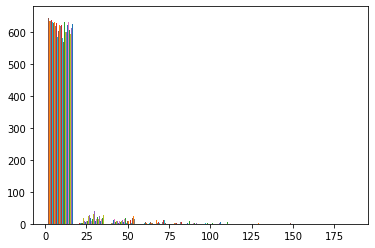

In [2]:
plt.hist(img);

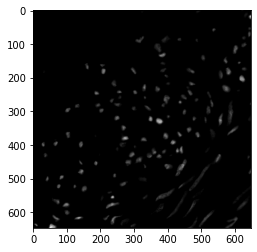

In [3]:
plt.imshow(img, cmap='gray')

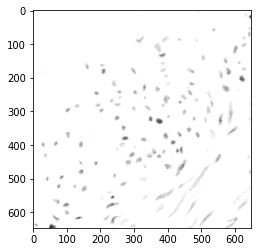

In [4]:
n_img = np.max(img) - img
plt.imshow(n_img, cmap='gray')

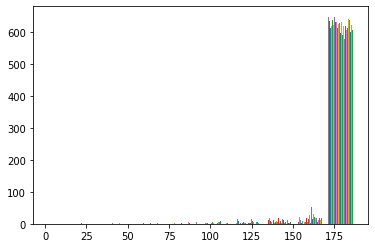

In [5]:
plt.hist(n_img);

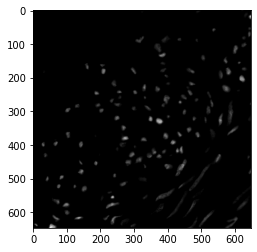

In [6]:
n_img2 = np.max(n_img) - n_img
plt.imshow(n_img2, cmap='gray')

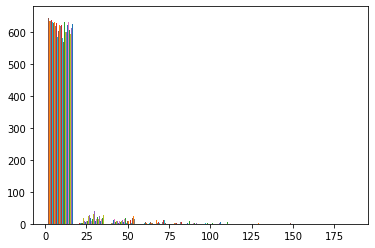

In [7]:
plt.hist(n_img2);

In [8]:
log_img = (np.log(img))

/tmp/ipykernel_16520/3189084890.py:1: RuntimeWarning: divide by zero encountered in log
  log_img = (np.log(img))


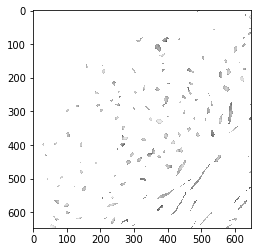

In [9]:
plt.imshow(log_img, cmap='gray')

In [10]:
lista = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        lista.append(img[i][j])

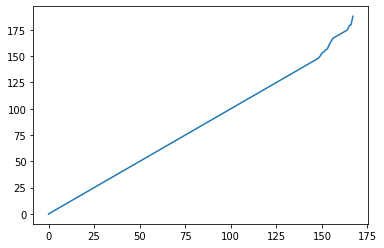

In [11]:
plt.plot(list(set(lista)), '-')

In [12]:
lista2 = []
for i in range(log_img.shape[0]):
    for j in range(log_img.shape[1]):
        lista2.append(log_img[i][j])

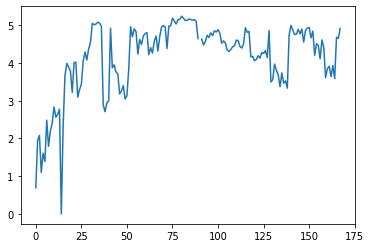

In [13]:
plt.plot(list(set(lista2)), '-')

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



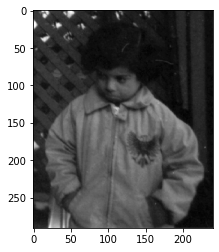

In [16]:
pout = cv2.imread('pout.tif', 0)
plt.imshow(pout, cmap='gray')

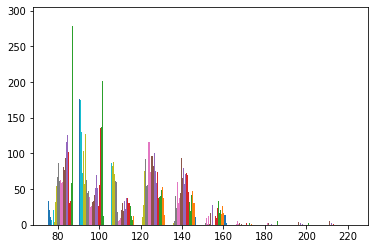

In [27]:
plt.hist(pout);

In [17]:
equalized_image = cv2.equalizeHist(pout)

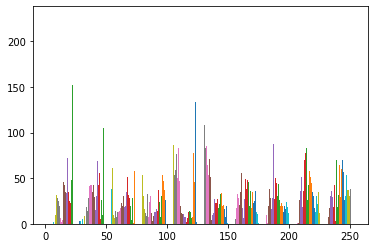

In [18]:
plt.hist(equalized_image);

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [22]:
imcells = cv2.imread('im_cells.png', 0)
eq_imcells = histogram_equalization(imcells)

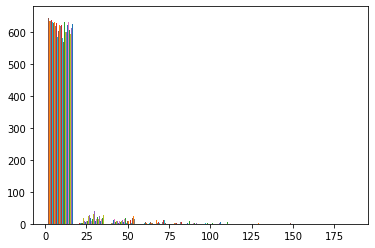

In [23]:
plt.hist(imcells);

In [24]:
def calculate_histogram(image, max_):
    # Cria uma lista de 0s
    histogram = [0] * (max_ + 1)

    # calcula o histograma da imagem interando sobre as linhas da imagem e atualizando a lista de zeros
    for row in image:
        for pixel_value in row:
            histogram[pixel_value] += 1

    return histogram

def calculate_cumulative_histogram(histogram, max_):
    # lista de 0s de comprimento max + 1 
    cumulative_histogram = [0] * (max_ + 1)

    cumulative_sum = 0
    for i, frequency in enumerate(histogram):
        cumulative_sum += frequency
        cumulative_histogram[i] = cumulative_sum

    return cumulative_histogram

def histogram_equalization(image):
    max_ = np.max(image)
    height, width = image.shape

    # Calcula i histograma da imagem
    histogram = calculate_histogram(image, max_)

    # Calcula a cdf
    cumulative_histogram = calculate_cumulative_histogram(histogram, max_)

    total_pixels = height * width

    # Cria uma lista para mapear o histograma acumulado/total de imagens
    mapping_table = [0] * (max_ + 1)
    for i in range(max_ + 1):
        mapping_table[i] = int((cumulative_histogram[i] / total_pixels) * max_)

    # Cria uma copia e aplica o mapeamento
    equalized_image = image.copy()
    for i in range(height):
        for j in range(width):
            equalized_image[i, j] = mapping_table[image[i, j]]

    return equalized_image

In [25]:
eq = histogram_equalization(imcells)

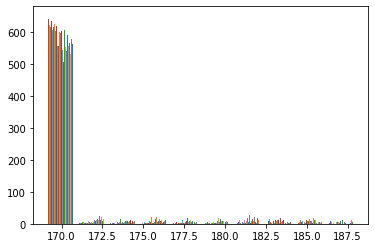

In [26]:
plt.hist(eq);

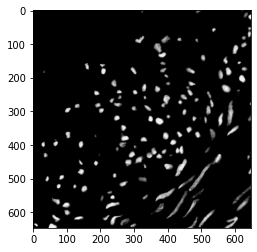

In [28]:
plt.imshow(eq, cmap='gray');